# **ARTIFICIAL NEURAL NETWORK**

**IMPORTING PACKAGES**

In [2]:
import pandas as pd


**IMPORTING DATA**

In [3]:
df = pd.read_csv('/content/housepricedata (1).csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


**CLASSIFIYING DATASET**

In [5]:
dataset=df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

**SPLITTING THE DATA**

In [7]:
X=dataset[:,0:10]

In [8]:
Y = dataset[:,10]

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**TRAINING THE MODEL**

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6948 - accuracy: 0.5225 - val_loss: 0.6940 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5215 - val_loss: 0.6914 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5263 - val_loss: 0.6888 - val_accuracy: 0.4703
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.4982 - val_loss: 0.6863 - val_accuracy: 0.4612
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5176 - val_loss: 0.6838 - val_accuracy: 0.4703
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5058 - val_loss: 0.6813 - val_accuracy: 0.4749
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5127 - val_loss: 0.6786 - val_accuracy: 0.4749
Epoch 8/100


In [21]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.8676


0.8675799369812012

**VISUALIZING THE DATA**

In [22]:
import matplotlib.pyplot as plt

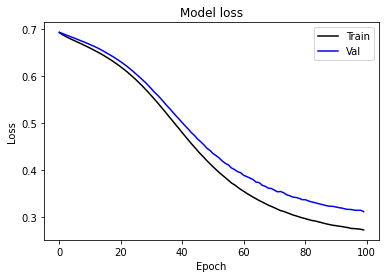

In [26]:
plt.plot(hist.history['loss'],color='black')
plt.plot(hist.history['val_loss'],color='blue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

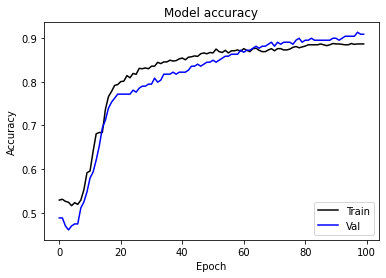

In [27]:
plt.plot(hist.history['accuracy'],color='black')
plt.plot(hist.history['val_accuracy'],color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 38ms/step - loss: 0.5767 - accuracy: 0.6736 - val_loss: 0.4069 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3676 - accuracy: 0.8458 - val_loss: 0.4483 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2989 - accuracy: 0.8669 - val_loss: 0.3660 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2810 - accuracy: 0.8830 - val_loss: 0.3500 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2730 - accuracy: 0.8894 - val_loss: 0.4063 - val_accuracy: 0.8402
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2680 - accuracy: 0.8955 - val_loss: 0.3278 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2684 - accuracy: 0.8788 - val_loss: 0.3247 - val_accuracy: 0.8950
Epoch 

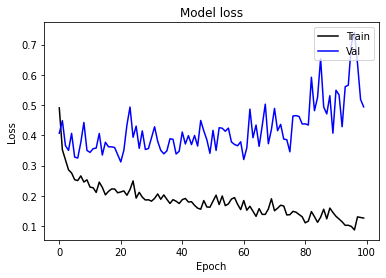

In [29]:
plt.plot(hist_2.history['loss'],color='black')
plt.plot(hist_2.history['val_loss'],color='blue')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

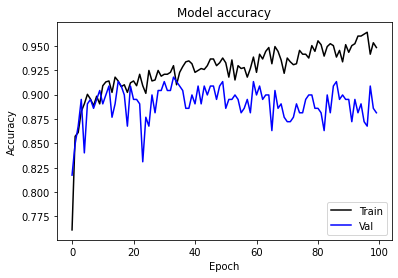

In [30]:
plt.plot(hist_2.history['accuracy'],color='black')
plt.plot(hist_2.history['val_accuracy'],color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()